## **Fast AI Colab**

In [ ]:
#setup
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 17.5MB/s 
     |████████████████████████████████| 194kB 59.2MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 1.2MB 21.7MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *
from fastai.vision.all import *

#CNN Learner for Image Classification

epoch,train_loss,valid_loss,error_rate,time
0,0.143221,0.027442,0.006766,00:53


epoch,train_loss,valid_loss,error_rate,time
0,0.063630,0.017836,0.005413,00:57


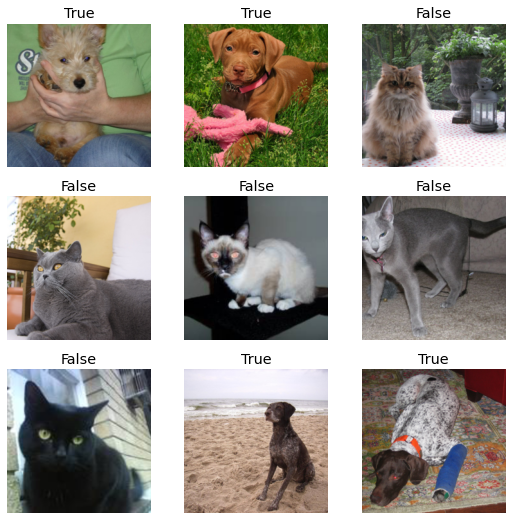

In [31]:
# generating a path URLfrom where the images that would be classified are loaded
path = untar_data(URLs.PETS)/'images'

def is_dog(x): return x[0].islower()

#loading dataset that contains 7,349 images of cats and dogs from 37 different breeds
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

dls.show_batch()

#cnn learner model
learn = cnn_learner(dls, resnet34, metrics=error_rate)

#fine tune the model since we are using a pretrained model
learn.fine_tune(1)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

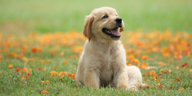

In [ ]:
# reading the image form the upload button above
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [ ]:
# using the generated model to predict whether the uploaded image is a cat or dog; dog in this instance
is_dog,_,probs = learn.predict(img)

#printing the prediction and its probability
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: True.
Probability it's a dog: 0.999939


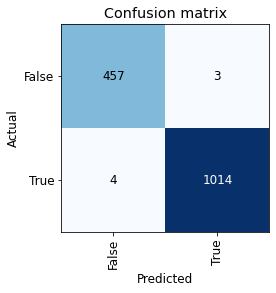

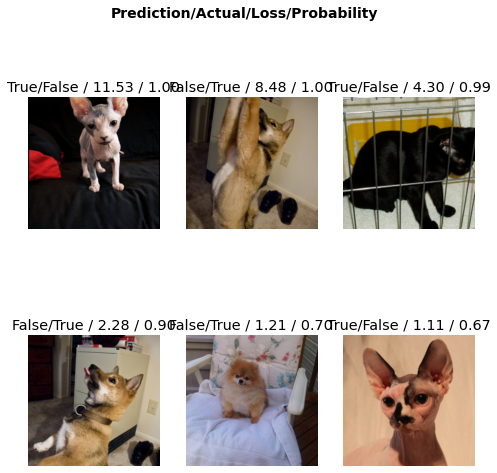

In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix(figsize=(4,4))
interpret.plot_top_losses(6, figsize=(8,8))

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

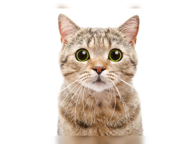

In [ ]:
# reading the image form the upload button above; cat in this instance
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [ ]:
# using the generated model to predict whether the uploaded image is a cat or dog
is_dog,_,probs = learn.predict(img)

#printing the prediction and its probability
print(f"Is this a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")

Is this a dog?: False.
Probability it's a dog: 0.000000


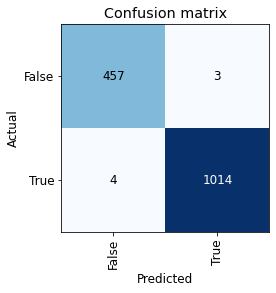

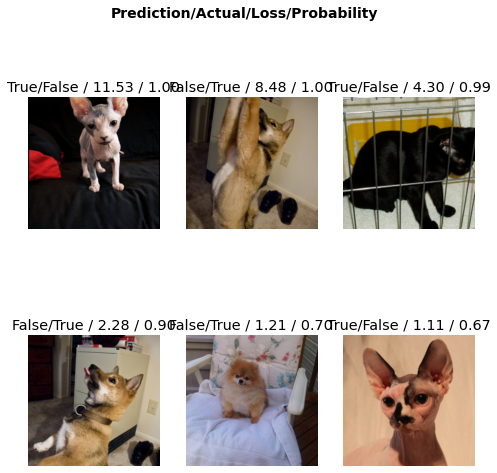

In [ ]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix(figsize=(4,4))
interpret.plot_top_losses(6, figsize=(8,8))

#UNET Learner for Segmentation

In [ ]:
# load Data from CAMVID Library
path = untar_data(URLs.CAMVID_TINY)

# read files
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)

#fine tune the model since we are using a pretrained model
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.669586,2.695347,00:02


epoch,train_loss,valid_loss,time
0,1.967547,1.629637,00:02
1,1.654146,1.363380,00:02
2,1.506687,1.303565,00:02
3,1.384669,1.100251,00:02
4,1.253858,0.921305,00:02
5,1.131931,0.842711,00:02
6,1.028510,0.783826,00:02
7,0.946204,0.774787,00:02


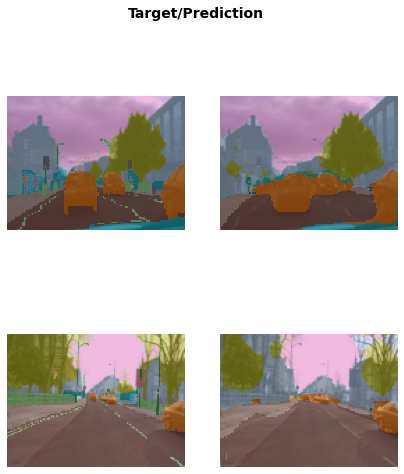

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

#Text classifier learner for Sentiment Analysis

In [ ]:
from fastai.text.all import *

In [23]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.465119,0.415871,0.806480,04:10


epoch,train_loss,valid_loss,accuracy,time
0,0.310561,0.537916,0.781160,08:01
1,0.244898,0.207387,0.918560,08:01


epoch,train_loss,valid_loss,accuracy,time
0,0.310561,0.537916,0.781160,08:01
1,0.244898,0.207387,0.918560,08:01
2,0.188009,0.189196,0.926960,08:01
3,0.141459,0.189707,0.931360,08:02


In [24]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([5.4747e-04, 9.9945e-01]))

In [25]:
learn.predict("I watched it and it was alright")

('pos', tensor(1), tensor([0.0122, 0.9878]))

In [26]:
learn.predict("That was a great movie!")

('pos', tensor(1), tensor([0.0070, 0.9930]))

#Tabular learner for Decision Tree

In [27]:
#tabular data classification
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)


In [28]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.364019,0.362266,0.830620,00:05
1,0.356824,0.346170,0.841063,00:05
2,0.347037,0.345236,0.841523,00:05


#Collab Learner for Ranking

In [29]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))

learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.504660,1.386113,00:00


epoch,train_loss,valid_loss,time
0,1.374197,1.328468,00:00
1,1.277819,1.155334,00:00
2,1.042433,0.856960,00:00
3,0.807616,0.716715,00:00
4,0.698861,0.684693,00:00
5,0.659276,0.671432,00:00
6,0.637648,0.667268,00:00
7,0.622245,0.664806,00:00
8,0.606591,0.663862,00:00
9,0.605121,0.663693,00:00


In [30]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,11.0,27.0,3.0,3.337212
1,44.0,18.0,5.0,4.242327
2,33.0,38.0,5.0,4.131671
3,48.0,56.0,5.0,4.428328
4,37.0,60.0,5.0,4.305482
5,89.0,27.0,4.0,3.663806
6,86.0,39.0,3.0,3.793179
7,77.0,18.0,5.0,3.999602
8,100.0,21.0,2.0,3.685811
